# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup

from City import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from IPython.display import JSON
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [6]:
### Perform API Calls
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).


## Generate Cities List

In [7]:
df_row = 0
# Set up dataframe to accept cities
df = pd.DataFrame([],columns=["City","Lat","Lon","Max Temp","Humidity","Cloudiness","Wind Speed", "Country", "Date"])

print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")
record = 1
set_ = 1

for city_name in cities:
    city = City(city_name)
    if city.skipQ():
        print("City not found. Skipping...")
    else:
        print(f"Processing Record {record} of Set {set_} | {city.name}")
        # add information to dataframe and then increase row
        
        df.loc[df_row,"City"] = city.name
        df.loc[df_row,"Lat"] = city.lat
        df.loc[df_row,"Lon"] = city.lng
        df.loc[df_row,"Max Temp"] = city.max_temp
        df.loc[df_row,"Humidity"] = city.humidity
        df.loc[df_row,"Cloudiness"] = city.cloudiness
        df.loc[df_row,"Wind Speed"] = city.wind_speed
        df.loc[df_row,"Country"] = city.country
        df.loc[df_row,"Date"] = city.date

        df_row += 1
        record += 1
        if record > 50:
            set_ += 1
            record = 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Record 2 of Set 3 | the pas
City not found. Skipping...
Processing Record 3 of Set 3 | chokurdakh
Processing Record 4 of Set 3 | jalu
Processing Record 5 of Set 3 | yushu
Processing Record 6 of Set 3 | cockburn town
City not found. Skipping...
Processing Record 7 of Set 3 | saldanha
Processing Record 8 of Set 3 | balkanabat
Processing Record 9 of Set 3 | kimberley
City not found. Skipping...
Processing Record 10 of Set 3 | bandarbeyla
City not found. Skipping...
Processing Record 11 of Set 3 | klaksvik
Processing Record 12 of Set 3 | provideniya
Processing Record 13 of Set 3 | khani
Processing Record 14 of Set 3 | airai
Processing Record 15 of Set 3 | nanortalik
Processing Record 16 of Set 3 | honiara
Processing Record 17 of Set 3 | port-cartier
Processing Record 18 of Set 3 | atbasar
Processing Record 19 of Set 3 | puerto gaitan
City not found. Skipping...
Processing Record 20 of Set 3 | tiksi
Processing Record 21 of Set 3 | new norfolk
Processing Record 22 of Set 3 | bluff
Processing

In [10]:
#checking for duplicates
df[df.duplicated()]    

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
df = pd.read_csv("output_data/cities.csv")
filt = df['Humidity'] <= 100
df = df[filt]

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

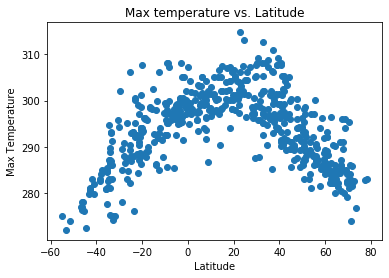

In [15]:
plt.scatter(df['Lat'],df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Max temperature vs. Latitude")
plt.savefig("Output_data/max_temp_vs.latitude.png")
plt.show()

## Latitude vs. Humidity Plot

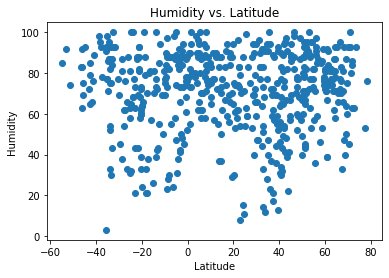

In [16]:
plt.scatter(df['Lat'],df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.savefig("output_data/humidity_vs_latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

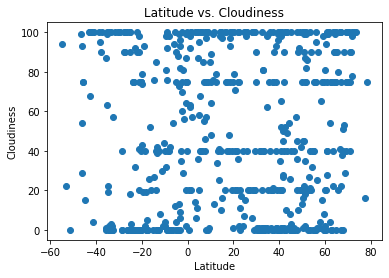

In [17]:
plt.scatter(df['Lat'],df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig("output_data/latitude_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

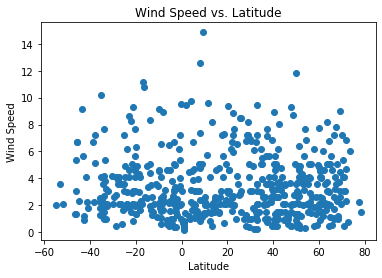

In [18]:
plt.scatter(df['Lat'],df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude")
plt.savefig("output_data/wind_speed_vs_latitude.png")
plt.show()

## Linear Regression

In [89]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(df,var):
    slope, intercept, rvalue, pvalue, stderr = linregress(df['Lat'],df[var])
    plt.scatter(df['Lat'],df[var],alpha=0.7)
    plt.plot(df['Lat'], slope*df['Lat'] + intercept, color="black")
    plt.xlabel("Latitude")
    plt.ylabel(var)
    plt.annotate(f"       Slope: {slope:.2f}\n       R: {rvalue:.2f}\n       R^2: {rvalue*rvalue:.2f}\n       p-value: {pvalue:.2e}",(df['Lat'].max(),df[var].max()-10))
    plt.show()


In [30]:
#plt.legend?

In [34]:
# Create Northern and Southern Hemisphere DataFrames
filt = df['Lat'] >= 0
northern_hemisphere_df = df[filt]

filt = df['Lat'] <= 0
southern_hemisphere_df = df[filt]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

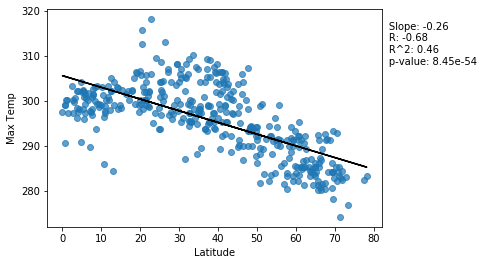

In [90]:
linear_regression_plot(northern_hemisphere_df, "Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

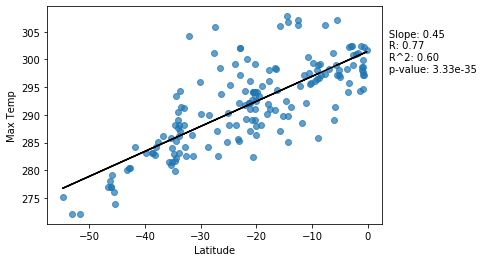

In [91]:
linear_regression_plot(southern_hemisphere_df, "Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression